In [274]:
# Tambahkan Library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.set_option("future.no_silent_downcasting", True)

In [275]:
# Membaca File CSV
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [276]:
# Mengecek Info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [277]:
df.drop(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'CarName'], axis=1, inplace=True)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   cylindernumber    205 non-null    object 
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 24.1+ KB


In [279]:
df.duplicated().sum()

3

In [280]:
df.drop_duplicates(inplace=True)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         202 non-null    float64
 1   carlength         202 non-null    float64
 2   carwidth          202 non-null    float64
 3   carheight         202 non-null    float64
 4   curbweight        202 non-null    int64  
 5   cylindernumber    202 non-null    object 
 6   enginesize        202 non-null    int64  
 7   boreratio         202 non-null    float64
 8   stroke            202 non-null    float64
 9   compressionratio  202 non-null    float64
 10  horsepower        202 non-null    int64  
 11  peakrpm           202 non-null    int64  
 12  citympg           202 non-null    int64  
 13  highwaympg        202 non-null    int64  
 14  price             202 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 25.2+ KB


In [282]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [283]:
stringtonum = {
    'four': 4,
    'six': 6,
    'five': 5,
    'three': 3,
    'twelve': 12,
    'two': 2,
    'eight': 8
}

df.loc[:, 'cylindernumber'] = df['cylindernumber'].replace(stringtonum)

In [284]:
df['cylindernumber']

,cylindernumber
0,4
1,4
2,6
3,4
4,5
...,...
200,4
201,4
202,6
203,6


In [285]:
class ValOutlier:
  def __init__(self, data):
    self.data = data
    self.totalData = len(self.data)
    self.mean = sum(data) / len(data)
    self.medianloc = self.totalData / 2
    self.median = (self.data[int(self.medianloc)] + self.data[int(self.medianloc + 1)]) / 2
    self.Q1 = self.data[int(self.totalData * 25 / 100) + 1]
    self.Q3 = self.data[int(self.totalData * 75 / 100)]
    self.IQR = self.Q3 - self.Q1
    self.Min = self.Q1 - 1.5 * self.IQR
    self.Max = self.Q3 + 1.5 * self.IQR
    self.z_score = sum(self.data - self.mean) / (self.totalData - 1)

  def AcceptableValue(self):
    return f"{self.Min} < Acceptable < {self.Max}"

In [286]:
OutlierWheelBase = ValOutlier(np.array(sorted(df['wheelbase'])))
OutlierWheelBase.AcceptableValue(), OutlierWheelBase.z_score ,OutlierWheelBase.data

('82.64999999999999 < Acceptable < 114.25000000000001',
 7.055936818791841e-14,
 array([ 86.6,  86.6,  88.4,  88.6,  88.6,  89.5,  89.5,  89.5,  91.3,
         91.3,  93. ,  93.1,  93.1,  93.1,  93.1,  93.1,  93.3,  93.7,
         93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  93.7,
         93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  93.7,  94.3,
         94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,
         94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,  94.5,
         94.5,  94.5,  94.5,  95.1,  95.3,  95.3,  95.3,  95.3,  95.7,
         95.7,  95.7,  95.7,  95.7,  95.7,  95.7,  95.7,  95.7,  95.7,
         95.7,  95.7,  95.7,  95.9,  95.9,  95.9,  95.9,  95.9,  96. ,
         96.1,  96.1,  96.3,  96.3,  96.3,  96.3,  96.3,  96.5,  96.5,
         96.5,  96.5,  96.5,  96.5,  96.5,  96.5,  96.6,  96.9,  96.9,
         97. ,  97. ,  97. ,  97. ,  97.2,  97.2,  97.2,  97.2,  97.2,
         97.3,  97.3,  97.3,  97.3,  97.3,  97.3,  97.3,  98.4,  98.

In [287]:
df.loc[:, 'wheelbase'] = df['wheelbase'].apply(lambda x : OutlierWheelBase.mean if x >= OutlierWheelBase.Max or x <= OutlierWheelBase.Min else x)
np.array(sorted(df['wheelbase']))

array([ 86.6       ,  86.6       ,  88.4       ,  88.6       ,
        88.6       ,  89.5       ,  89.5       ,  89.5       ,
        91.3       ,  91.3       ,  93.        ,  93.1       ,
        93.1       ,  93.1       ,  93.1       ,  93.1       ,
        93.3       ,  93.7       ,  93.7       ,  93.7       ,
        93.7       ,  93.7       ,  93.7       ,  93.7       ,
        93.7       ,  93.7       ,  93.7       ,  93.7       ,
        93.7       ,  93.7       ,  93.7       ,  93.7       ,
        93.7       ,  93.7       ,  93.7       ,  94.3       ,
        94.5       ,  94.5       ,  94.5       ,  94.5       ,
        94.5       ,  94.5       ,  94.5       ,  94.5       ,
        94.5       ,  94.5       ,  94.5       ,  94.5       ,
        94.5       ,  94.5       ,  94.5       ,  94.5       ,
        94.5       ,  94.5       ,  94.5       ,  94.5       ,
        94.5       ,  95.1       ,  95.3       ,  95.3       ,
        95.3       ,  95.3       ,  95.7       ,  95.7 

In [288]:
OutlierCarLength = ValOutlier(np.array(sorted(df['carlength'])))
OutlierCarLength.AcceptableValue(), OutlierCarLength.z_score ,OutlierCarLength.data

('141.75000000000003 < Acceptable < 208.54999999999998',
 3.492618024532234e-14,
 array([141.1, 144.6, 144.6, 150. , 150. , 150. , 155.9, 155.9, 155.9,
        156.9, 157.1, 157.3, 157.3, 157.3, 157.3, 157.3, 157.3, 157.3,
        157.3, 157.3, 157.3, 157.3, 157.3, 157.3, 157.9, 158.7, 158.7,
        158.7, 158.8, 159.1, 159.1, 159.1, 159.3, 162.4, 163.4, 165.3,
        165.3, 165.3, 165.3, 165.3, 165.3, 165.6, 165.7, 166.3, 166.3,
        166.3, 166.3, 166.3, 166.3, 166.3, 166.8, 166.8, 167.3, 167.3,
        167.5, 167.5, 168.7, 168.7, 168.7, 168.7, 168.8, 168.8, 168.9,
        168.9, 168.9, 168.9, 169. , 169. , 169. , 169. , 169.1, 169.7,
        169.7, 169.7, 170.2, 170.2, 170.7, 170.7, 170.7, 171.2, 171.7,
        171.7, 171.7, 171.7, 171.7, 171.7, 171.7, 172. , 172. , 172. ,
        172. , 172. , 172.4, 172.4, 172.4, 172.6, 173. , 173. , 173.2,
        173.2, 173.2, 173.2, 173.2, 173.4, 173.4, 173.5, 173.5, 173.6,
        173.6, 174.6, 174.6, 175. , 175. , 175.4, 175.4, 175.4, 175

In [289]:
df.loc[:, 'carlength'] = df['carlength'].apply(lambda x : OutlierCarLength.mean if x >= OutlierCarLength.Max or x <= OutlierCarLength.Min else x)
np.array(sorted(df['carlength']))

array([144.6       , 144.6       , 150.        , 150.        ,
       150.        , 155.9       , 155.9       , 155.9       ,
       156.9       , 157.1       , 157.3       , 157.3       ,
       157.3       , 157.3       , 157.3       , 157.3       ,
       157.3       , 157.3       , 157.3       , 157.3       ,
       157.3       , 157.3       , 157.3       , 157.9       ,
       158.7       , 158.7       , 158.7       , 158.8       ,
       159.1       , 159.1       , 159.1       , 159.3       ,
       162.4       , 163.4       , 165.3       , 165.3       ,
       165.3       , 165.3       , 165.3       , 165.3       ,
       165.6       , 165.7       , 166.3       , 166.3       ,
       166.3       , 166.3       , 166.3       , 166.3       ,
       166.3       , 166.8       , 166.8       , 167.3       ,
       167.3       , 167.5       , 167.5       , 168.7       ,
       168.7       , 168.7       , 168.7       , 168.8       ,
       168.8       , 168.9       , 168.9       , 168.9 

In [290]:
OutlierCarWidth = ValOutlier(np.array(sorted(df['carwidth'])))
OutlierCarWidth.AcceptableValue(), OutlierCarWidth.z_score ,OutlierCarWidth.data

('60.15 < Acceptable < 70.95000000000002',
 5.076315266425392e-14,
 array([60.3, 61.8, 62.5, 63.4, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6, 63.6,
        63.6, 63.6, 63.6, 63.6, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8,
        63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8, 63.8,
        63.8, 63.8, 63.8, 63.8, 63.9, 63.9, 63.9, 64. , 64. , 64. , 64. ,
        64. , 64. , 64. , 64. , 64. , 64.1, 64.1, 64.2, 64.2, 64.2, 64.2,
        64.2, 64.2, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4, 64.4,
        64.4, 64.6, 64.6, 64.8, 64.8, 64.8, 64.8, 65. , 65. , 65. , 65.2,
        65.2, 65.2, 65.2, 65.2, 65.2, 65.2, 65.4, 65.4, 65.4, 65.4, 65.4,
        65.4, 65.4, 65.4, 65.4, 65.4, 65.4, 65.4, 65.4, 65.4, 65.5, 65.5,
        65.5, 65.5, 65.5, 65.5, 65.5, 65.5, 65.6, 65.6, 65.6, 65.6, 65.6,
        65.6, 65.7, 65.7, 65.7, 65.7, 66. , 66.1, 66.1, 66.2, 66.3, 66.3,
        66.3, 66.3, 66.3, 66.3, 66.4, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5,
        66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 6

In [291]:
df.loc[:, 'carwidth'] = df['carwidth'].apply(lambda x : OutlierCarWidth.mean if x >= OutlierCarWidth.Max or x <= OutlierCarWidth.Min else x)
np.array(sorted(df['carwidth']))

array([60.3       , 61.8       , 62.5       , 63.4       , 63.6       ,
       63.6       , 63.6       , 63.6       , 63.6       , 63.6       ,
       63.6       , 63.6       , 63.6       , 63.6       , 63.6       ,
       63.8       , 63.8       , 63.8       , 63.8       , 63.8       ,
       63.8       , 63.8       , 63.8       , 63.8       , 63.8       ,
       63.8       , 63.8       , 63.8       , 63.8       , 63.8       ,
       63.8       , 63.8       , 63.8       , 63.8       , 63.8       ,
       63.8       , 63.8       , 63.9       , 63.9       , 63.9       ,
       64.        , 64.        , 64.        , 64.        , 64.        ,
       64.        , 64.        , 64.        , 64.        , 64.1       ,
       64.1       , 64.2       , 64.2       , 64.2       , 64.2       ,
       64.2       , 64.2       , 64.4       , 64.4       , 64.4       ,
       64.4       , 64.4       , 64.4       , 64.4       , 64.4       ,
       64.4       , 64.4       , 64.6       , 64.6       , 64.8 

In [292]:
OutlierCarHeight = ValOutlier(np.array(sorted(df['carheight'])))
OutlierCarHeight.AcceptableValue(), OutlierCarHeight.z_score ,OutlierCarHeight.data

('46.75 < Acceptable < 60.75',
 -1.0177375802255366e-13,
 array([47.8, 48.8, 48.8, 49.4, 49.4, 49.6, 49.6, 49.6, 49.6, 49.7, 49.7,
        49.7, 50.2, 50.2, 50.2, 50.2, 50.2, 50.2, 50.5, 50.5, 50.6, 50.6,
        50.6, 50.6, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8,
        50.8, 50.8, 50.8, 50.8, 51. , 51.4, 51.4, 51.6, 51.6, 51.6, 51.6,
        51.6, 51.6, 52. , 52. , 52. , 52. , 52. , 52. , 52. , 52. , 52. ,
        52. , 52. , 52. , 52.4, 52.5, 52.5, 52.5, 52.6, 52.6, 52.6, 52.6,
        52.6, 52.6, 52.6, 52.8, 52.8, 52.8, 52.8, 52.8, 52.8, 53. , 53. ,
        53. , 53. , 53. , 53. , 53.1, 53.2, 53.3, 53.3, 53.3, 53.3, 53.5,
        53.5, 53.5, 53.7, 53.7, 53.7, 53.7, 53.7, 53.9, 53.9, 54.1, 54.1,
        54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.3, 54.3, 54.3,
        54.3, 54.3, 54.3, 54.3, 54.3, 54.4, 54.4, 54.5, 54.5, 54.5, 54.5,
        54.5, 54.5, 54.5, 54.5, 54.5, 54.5, 54.7, 54.7, 54.8, 54.9, 54.9,
        54.9, 54.9, 54.9, 54.9, 55.1, 55.1, 55.1, 55.1,

In [293]:
df.loc[:, 'carheight'] = df['carheight'].apply(lambda x : OutlierCarHeight.mean if x >= OutlierCarHeight.Max or x <= OutlierCarHeight.Min else x)
np.array(sorted(df['carheight']))

array([47.8, 48.8, 48.8, 49.4, 49.4, 49.6, 49.6, 49.6, 49.6, 49.7, 49.7,
       49.7, 50.2, 50.2, 50.2, 50.2, 50.2, 50.2, 50.5, 50.5, 50.6, 50.6,
       50.6, 50.6, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8, 50.8,
       50.8, 50.8, 50.8, 50.8, 51. , 51.4, 51.4, 51.6, 51.6, 51.6, 51.6,
       51.6, 51.6, 52. , 52. , 52. , 52. , 52. , 52. , 52. , 52. , 52. ,
       52. , 52. , 52. , 52.4, 52.5, 52.5, 52.5, 52.6, 52.6, 52.6, 52.6,
       52.6, 52.6, 52.6, 52.8, 52.8, 52.8, 52.8, 52.8, 52.8, 53. , 53. ,
       53. , 53. , 53. , 53. , 53.1, 53.2, 53.3, 53.3, 53.3, 53.3, 53.5,
       53.5, 53.5, 53.7, 53.7, 53.7, 53.7, 53.7, 53.9, 53.9, 54.1, 54.1,
       54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.1, 54.3, 54.3, 54.3,
       54.3, 54.3, 54.3, 54.3, 54.3, 54.4, 54.4, 54.5, 54.5, 54.5, 54.5,
       54.5, 54.5, 54.5, 54.5, 54.5, 54.5, 54.7, 54.7, 54.8, 54.9, 54.9,
       54.9, 54.9, 54.9, 54.9, 55.1, 55.1, 55.1, 55.1, 55.1, 55.2, 55.4,
       55.5, 55.5, 55.5, 55.5, 55.5, 55.5, 55.5, 55

In [294]:
OutlierCurbWeight = ValOutlier(np.array(sorted(df['curbweight'])))
OutlierCurbWeight.AcceptableValue(), OutlierCurbWeight.z_score ,OutlierCurbWeight.data

('1047.0 < Acceptable < 4095.0',
 -8.846080308288928e-13,
 array([1488, 1713, 1819, 1837, 1874, 1874, 1876, 1876, 1889, 1890, 1900,
        1905, 1909, 1909, 1918, 1918, 1918, 1938, 1940, 1944, 1945, 1950,
        1951, 1956, 1967, 1971, 1985, 1989, 1989, 1989, 2004, 2008, 2010,
        2015, 2017, 2024, 2024, 2028, 2037, 2040, 2050, 2081, 2094, 2109,
        2120, 2122, 2128, 2140, 2145, 2145, 2169, 2190, 2191, 2191, 2204,
        2209, 2212, 2221, 2236, 2240, 2254, 2261, 2264, 2265, 2275, 2275,
        2275, 2280, 2289, 2290, 2290, 2293, 2300, 2300, 2302, 2304, 2319,
        2324, 2326, 2328, 2337, 2337, 2340, 2365, 2370, 2372, 2380, 2380,
        2385, 2385, 2385, 2385, 2395, 2395, 2403, 2405, 2410, 2410, 2414,
        2414, 2420, 2425, 2443, 2455, 2458, 2460, 2465, 2480, 2500, 2507,
        2510, 2535, 2535, 2536, 2540, 2548, 2548, 2551, 2563, 2579, 2579,
        2650, 2658, 2661, 2670, 2679, 2695, 2700, 2707, 2710, 2714, 2734,
        2756, 2756, 2758, 2765, 2778, 2800, 2808, 2811

In [295]:
df.loc[:, 'curbweight'] = df['curbweight'].apply(lambda x : OutlierCurbWeight.mean if x >= OutlierCurbWeight.Max or x <= OutlierCurbWeight.Min else x)

In [296]:
np.array(sorted(df['curbweight']))

array([1488, 1713, 1819, 1837, 1874, 1874, 1876, 1876, 1889, 1890, 1900,
       1905, 1909, 1909, 1918, 1918, 1918, 1938, 1940, 1944, 1945, 1950,
       1951, 1956, 1967, 1971, 1985, 1989, 1989, 1989, 2004, 2008, 2010,
       2015, 2017, 2024, 2024, 2028, 2037, 2040, 2050, 2081, 2094, 2109,
       2120, 2122, 2128, 2140, 2145, 2145, 2169, 2190, 2191, 2191, 2204,
       2209, 2212, 2221, 2236, 2240, 2254, 2261, 2264, 2265, 2275, 2275,
       2275, 2280, 2289, 2290, 2290, 2293, 2300, 2300, 2302, 2304, 2319,
       2324, 2326, 2328, 2337, 2337, 2340, 2365, 2370, 2372, 2380, 2380,
       2385, 2385, 2385, 2385, 2395, 2395, 2403, 2405, 2410, 2410, 2414,
       2414, 2420, 2425, 2443, 2455, 2458, 2460, 2465, 2480, 2500, 2507,
       2510, 2535, 2535, 2536, 2540, 2548, 2548, 2551, 2563, 2579, 2579,
       2650, 2658, 2661, 2670, 2679, 2695, 2700, 2707, 2710, 2714, 2734,
       2756, 2756, 2758, 2765, 2778, 2800, 2808, 2811, 2818, 2823, 2824,
       2833, 2844, 2847, 2910, 2912, 2921, 2926, 29

In [297]:
OutlierEngineSize = ValOutlier(np.array(sorted(df['enginesize'])))
OutlierEngineSize.AcceptableValue(), OutlierEngineSize.z_score,OutlierEngineSize.data

('27.5 < Acceptable < 215.5',
 -6.87211481750067e-14,
 array([ 61,  70,  70,  70,  79,  80,  90,  90,  90,  90,  90,  90,  90,
         90,  90,  90,  90,  91,  91,  91,  91,  91,  92,  92,  92,  92,
         92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  97,  97,
         97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  98,
         98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98, 103,
        108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108,
        109, 109, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110,
        110, 110, 110, 110, 110, 110, 111, 119, 120, 120, 120, 120, 120,
        120, 120, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122,
        122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 130, 130, 130,
        130, 131, 131, 132, 132, 134, 134, 136, 136, 136, 136, 136, 140,
        140, 141, 141, 141, 141, 141, 141, 141, 145, 146, 146, 146, 146,
        146, 146, 151, 152, 152, 152, 152, 152, 152, 156, 156, 156, 15

In [298]:
df.loc[:, 'enginesize'] = df['enginesize'].apply(lambda x : int(OutlierEngineSize.mean) if x >= OutlierEngineSize.Max or x <= OutlierEngineSize.Min else x)
np.array(sorted(df['enginesize']))

array([ 61,  70,  70,  70,  79,  80,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  91,  91,  91,  91,  91,  92,  92,  92,  92,
        92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  97,  97,
        97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  98,
        98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98, 103,
       108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108,
       109, 109, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110,
       110, 110, 110, 110, 110, 110, 111, 119, 120, 120, 120, 120, 120,
       120, 120, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 127, 127, 127,
       127, 127, 127, 127, 130, 130, 130, 130, 131, 131, 132, 132, 134,
       134, 136, 136, 136, 136, 136, 140, 140, 141, 141, 141, 141, 141,
       141, 141, 145, 146, 146, 146, 146, 146, 146, 151, 152, 152, 152,
       152, 152, 152, 156, 156, 156, 156, 156, 161, 164, 164, 16

In [299]:
OutlierBoreRatio = ValOutlier(np.array(sorted(df['boreratio'])))
OutlierBoreRatio.AcceptableValue(), OutlierBoreRatio.z_score,OutlierBoreRatio.data

('2.49 < Acceptable < 4.25',
 1.0892337336123427e-15,
 array([2.54, 2.68, 2.91, 2.91, 2.91, 2.91, 2.91, 2.91, 2.91, 2.92, 2.97,
        2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.99,
        3.01, 3.01, 3.01, 3.01, 3.01, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03,
        3.03, 3.03, 3.03, 3.03, 3.03, 3.05, 3.05, 3.05, 3.05, 3.05, 3.05,
        3.08, 3.13, 3.13, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15,
        3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.17, 3.17, 3.19, 3.19,
        3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19,
        3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.24, 3.24, 3.27, 3.27,
        3.27, 3.27, 3.27, 3.27, 3.27, 3.31, 3.31, 3.31, 3.31, 3.31, 3.31,
        3.31, 3.31, 3.33, 3.33, 3.33, 3.33, 3.33, 3.33, 3.34, 3.35, 3.35,
        3.35, 3.35, 3.39, 3.39, 3.39, 3.39, 3.39, 3.39, 3.43, 3.43, 3.43,
        3.43, 3.43, 3.43, 3.43, 3.43, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46,
        3.46, 3.46, 3.46, 3.47, 3.47, 3.5 , 3.5 , 3.54, 3.

In [300]:
df.loc[:, 'boreratio'] = df['boreratio'].apply(lambda x : OutlierBoreRatio.mean if x >= OutlierBoreRatio.Max or x <= OutlierBoreRatio.Min else x)
np.array(sorted(df['boreratio']))

array([2.54, 2.68, 2.91, 2.91, 2.91, 2.91, 2.91, 2.91, 2.91, 2.92, 2.97,
       2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.97, 2.99,
       3.01, 3.01, 3.01, 3.01, 3.01, 3.03, 3.03, 3.03, 3.03, 3.03, 3.03,
       3.03, 3.03, 3.03, 3.03, 3.03, 3.05, 3.05, 3.05, 3.05, 3.05, 3.05,
       3.08, 3.13, 3.13, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15,
       3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.15, 3.17, 3.17, 3.19, 3.19,
       3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19,
       3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.19, 3.24, 3.24, 3.27, 3.27,
       3.27, 3.27, 3.27, 3.27, 3.27, 3.31, 3.31, 3.31, 3.31, 3.31, 3.31,
       3.31, 3.31, 3.33, 3.33, 3.33, 3.33, 3.33, 3.33, 3.34, 3.35, 3.35,
       3.35, 3.35, 3.39, 3.39, 3.39, 3.39, 3.39, 3.39, 3.43, 3.43, 3.43,
       3.43, 3.43, 3.43, 3.43, 3.43, 3.46, 3.46, 3.46, 3.46, 3.46, 3.46,
       3.46, 3.46, 3.46, 3.47, 3.47, 3.5 , 3.5 , 3.54, 3.54, 3.54, 3.54,
       3.54, 3.54, 3.58, 3.58, 3.58, 3.58, 3.58, 3.

In [301]:
OutlierStroke = ValOutlier(np.array(sorted(df['stroke'])))
OutlierStroke.AcceptableValue(), OutlierStroke.z_score,OutlierStroke.data

('2.6599999999999993 < Acceptable < 3.8600000000000003',
 1.338895826712129e-15,
 array([2.07 , 2.19 , 2.19 , 2.36 , 2.64 , 2.64 , 2.64 , 2.64 , 2.64 ,
        2.64 , 2.64 , 2.64 , 2.64 , 2.64 , 2.64 , 2.68 , 2.68 , 2.76 ,
        2.8  , 2.8  , 2.87 , 2.9  , 2.9  , 2.9  , 3.03 , 3.03 , 3.03 ,
        3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.03 ,
        3.03 , 3.03 , 3.07 , 3.07 , 3.07 , 3.07 , 3.07 , 3.07 , 3.08 ,
        3.08 , 3.1  , 3.1  , 3.11 , 3.11 , 3.11 , 3.11 , 3.11 , 3.11 ,
        3.12 , 3.15 , 3.15 , 3.15 , 3.15 , 3.15 , 3.15 , 3.15 , 3.15 ,
        3.15 , 3.15 , 3.15 , 3.15 , 3.15 , 3.15 , 3.16 , 3.19 , 3.19 ,
        3.19 , 3.19 , 3.19 , 3.19 , 3.21 , 3.23 , 3.23 , 3.23 , 3.23 ,
        3.23 , 3.23 , 3.23 , 3.23 , 3.23 , 3.23 , 3.23 , 3.23 , 3.23 ,
        3.255, 3.255, 3.255, 3.255, 3.27 , 3.27 , 3.27 , 3.27 , 3.27 ,
        3.27 , 3.29 , 3.29 , 3.29 , 3.29 , 3.29 , 3.29 , 3.29 , 3.29 ,
        3.29 , 3.35 , 3.35 , 3.35 , 3.35 , 3.35 , 3.35 , 3.35 , 3.3

In [302]:
df.loc[:, 'stroke'] = df['stroke'].apply(lambda x : OutlierStroke.mean if x >= OutlierStroke.Max or x <= OutlierStroke.Min else x)
np.array(sorted(df['stroke']))

array([2.68      , 2.68      , 2.76      , 2.8       , 2.8       ,
       2.87      , 2.9       , 2.9       , 2.9       , 3.03      ,
       3.03      , 3.03      , 3.03      , 3.03      , 3.03      ,
       3.03      , 3.03      , 3.03      , 3.03      , 3.03      ,
       3.03      , 3.03      , 3.03      , 3.07      , 3.07      ,
       3.07      , 3.07      , 3.07      , 3.07      , 3.08      ,
       3.08      , 3.1       , 3.1       , 3.11      , 3.11      ,
       3.11      , 3.11      , 3.11      , 3.11      , 3.12      ,
       3.15      , 3.15      , 3.15      , 3.15      , 3.15      ,
       3.15      , 3.15      , 3.15      , 3.15      , 3.15      ,
       3.15      , 3.15      , 3.15      , 3.15      , 3.16      ,
       3.19      , 3.19      , 3.19      , 3.19      , 3.19      ,
       3.19      , 3.21      , 3.23      , 3.23      , 3.23      ,
       3.23      , 3.23      , 3.23      , 3.23      , 3.23      ,
       3.23      , 3.23      , 3.23      , 3.23      , 3.23   

In [303]:
OutlierCompressionRatio = ValOutlier(np.array(sorted(df['compressionratio'])))
OutlierCompressionRatio.AcceptableValue(), OutlierCompressionRatio.z_score,OutlierCompressionRatio.data

('7.399999999999999 < Acceptable < 10.600000000000001',
 -4.966729073347964e-15,
 array([ 7.  ,  7.  ,  7.  ,  7.  ,  7.  ,  7.  ,  7.  ,  7.5 ,  7.5 ,
         7.5 ,  7.5 ,  7.6 ,  7.6 ,  7.6 ,  7.7 ,  7.7 ,  7.8 ,  8.  ,
         8.  ,  8.  ,  8.  ,  8.  ,  8.  ,  8.  ,  8.  ,  8.1 ,  8.1 ,
         8.3 ,  8.3 ,  8.3 ,  8.4 ,  8.4 ,  8.4 ,  8.4 ,  8.4 ,  8.5 ,
         8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.5 ,
         8.5 ,  8.5 ,  8.5 ,  8.5 ,  8.6 ,  8.6 ,  8.6 ,  8.6 ,  8.6 ,
         8.7 ,  8.7 ,  8.7 ,  8.7 ,  8.7 ,  8.7 ,  8.7 ,  8.7 ,  8.7 ,
         8.8 ,  8.8 ,  8.8 ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
         9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
         9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
         9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
         9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
         9.  ,  9.  ,  9.  ,  9.  ,  9.1 ,  9.2 ,  9.2 ,  9.2 ,  9.

In [304]:
df.loc[:, 'compressionratio'] = df['compressionratio'].apply(lambda x : OutlierCompressionRatio.mean if x >= OutlierCompressionRatio.Max or x <= OutlierCompressionRatio.Min else x)
np.array(sorted(df['compressionratio']))

array([ 7.5       ,  7.5       ,  7.5       ,  7.5       ,  7.6       ,
        7.6       ,  7.6       ,  7.7       ,  7.7       ,  7.8       ,
        8.        ,  8.        ,  8.        ,  8.        ,  8.        ,
        8.        ,  8.        ,  8.        ,  8.1       ,  8.1       ,
        8.3       ,  8.3       ,  8.3       ,  8.4       ,  8.4       ,
        8.4       ,  8.4       ,  8.4       ,  8.5       ,  8.5       ,
        8.5       ,  8.5       ,  8.5       ,  8.5       ,  8.5       ,
        8.5       ,  8.5       ,  8.5       ,  8.5       ,  8.5       ,
        8.5       ,  8.5       ,  8.6       ,  8.6       ,  8.6       ,
        8.6       ,  8.6       ,  8.7       ,  8.7       ,  8.7       ,
        8.7       ,  8.7       ,  8.7       ,  8.7       ,  8.7       ,
        8.7       ,  8.8       ,  8.8       ,  8.8       ,  9.        ,
        9.        ,  9.        ,  9.        ,  9.        ,  9.        ,
        9.        ,  9.        ,  9.        ,  9.        ,  9.  

In [305]:
OutlierHorsePower = ValOutlier(np.array(sorted(df['horsepower'])))
OutlierHorsePower.AcceptableValue(), OutlierHorsePower.z_score,OutlierHorsePower.data

('1.0 < Acceptable < 185.0',
 -6.249948043899787e-14,
 array([ 48,  52,  52,  55,  56,  56,  58,  60,  62,  62,  62,  62,  62,
         62,  64,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,
         68,  68,  68,  68,  68,  68,  68,  69,  69,  69,  69,  69,  69,
         69,  69,  69,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,
         70,  70,  72,  73,  73,  73,  76,  76,  76,  76,  76,  78,  82,
         82,  82,  82,  82,  84,  84,  84,  84,  84,  85,  85,  85,  86,
         86,  86,  86,  88,  88,  88,  88,  88,  88,  90,  90,  90,  90,
         90,  92,  92,  92,  92,  94,  94,  95,  95,  95,  95,  95,  95,
         95,  97,  97,  97,  97,  97, 100, 100, 101, 101, 101, 101, 101,
        101, 102, 102, 102, 102, 106, 110, 110, 110, 110, 110, 110, 110,
        110, 111, 111, 111, 111, 112, 112, 114, 114, 114, 114, 114, 114,
        115, 116, 116, 116, 116, 116, 116, 116, 116, 120, 121, 121, 121,
        123, 123, 123, 123, 134, 135, 140, 142, 143, 145, 145, 145, 14

In [306]:
df.loc[:, 'horsepower'] = df['horsepower'].apply(lambda x : int(OutlierHorsePower.mean) if x >= OutlierHorsePower.Max or x <= OutlierHorsePower.Min else x)
np.array(sorted(df['horsepower']))

array([ 48,  52,  52,  55,  56,  56,  58,  60,  62,  62,  62,  62,  62,
        62,  64,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,
        68,  68,  68,  68,  68,  68,  68,  69,  69,  69,  69,  69,  69,
        69,  69,  69,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  72,  73,  73,  73,  76,  76,  76,  76,  76,  78,  82,
        82,  82,  82,  82,  84,  84,  84,  84,  84,  85,  85,  85,  86,
        86,  86,  86,  88,  88,  88,  88,  88,  88,  90,  90,  90,  90,
        90,  92,  92,  92,  92,  94,  94,  95,  95,  95,  95,  95,  95,
        95,  97,  97,  97,  97,  97, 100, 100, 101, 101, 101, 101, 101,
       101, 102, 102, 102, 102, 104, 104, 104, 104, 104, 104, 106, 110,
       110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 112, 112,
       114, 114, 114, 114, 114, 114, 115, 116, 116, 116, 116, 116, 116,
       116, 116, 120, 121, 121, 121, 123, 123, 123, 123, 134, 135, 140,
       142, 143, 145, 145, 145, 145, 145, 152, 152, 152, 154, 15

In [307]:
OutlierPeakRPM = ValOutlier(np.array(sorted(df['peakrpm'])))
OutlierPeakRPM.AcceptableValue(), OutlierPeakRPM.z_score,OutlierPeakRPM.data

('3750.0 < Acceptable < 6550.0',
 1.4479517640166022e-12,
 array([4150, 4150, 4150, 4150, 4150, 4200, 4200, 4200, 4200, 4200, 4250,
        4250, 4250, 4350, 4350, 4350, 4350, 4400, 4400, 4400, 4500, 4500,
        4500, 4500, 4500, 4500, 4500, 4650, 4750, 4750, 4750, 4750, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4900, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
        5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
        5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5100, 5100, 5100,
        5100, 5100, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
        5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
        5200, 5200, 5200, 5250, 5250, 5250, 5250, 5250, 5250, 5250, 5300,
        5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400

In [308]:
df.loc[:, 'peakrpm'] = df['peakrpm'].apply(lambda x : int(OutlierPeakRPM.mean) if x >= OutlierPeakRPM.Max or x <= OutlierPeakRPM.Min else x)
np.array(sorted(df['peakrpm']))

array([4150, 4150, 4150, 4150, 4150, 4200, 4200, 4200, 4200, 4200, 4250,
       4250, 4250, 4350, 4350, 4350, 4350, 4400, 4400, 4400, 4500, 4500,
       4500, 4500, 4500, 4500, 4500, 4650, 4750, 4750, 4750, 4750, 4800,
       4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
       4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
       4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
       4800, 4800, 4900, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000,
       5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5100, 5100, 5100,
       5100, 5100, 5119, 5119, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 5200, 5200, 5250, 5250, 5250, 5250, 5250, 5250,
       5250, 5300, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400,
       5400, 5400, 5400, 5400, 5500, 5500, 5500, 55

In [309]:
OutlierCityMPG = ValOutlier(np.array(sorted(df['citympg'])))
OutlierCityMPG.AcceptableValue(), OutlierCityMPG.z_score, OutlierCityMPG.data

('2.5 < Acceptable < 46.5',
 -1.187772931419869e-14,
 array([13, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
        22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30,
        30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 33, 34, 35, 36, 37,
        37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 45, 47, 49]))

In [310]:
df.loc[:, 'citympg'] = df['citympg'].apply(lambda x : int(OutlierCityMPG.mean) if x >= OutlierCityMPG.Max or x <= OutlierCityMPG.Min else x)
np.array(sorted(df['citympg']))

array([13, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30,
       30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 33, 34, 35,
       36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 45])

In [311]:
OutlierHighwayMPG = ValOutlier(np.array(sorted(df['highwaympg'])))
OutlierHighwayMPG.AcceptableValue(), OutlierHighwayMPG.z_score, OutlierHighwayMPG.data

('11.5 < Acceptable < 47.5',
 1.2549386626608735e-14,
 array([16, 16, 17, 18, 18, 19, 19, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22,
        23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36,
        36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38,
        38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 41, 41,
        41, 42, 42, 42, 43, 43, 43, 43, 46, 46, 47, 47, 50, 53, 54]))

In [312]:
df.loc[:, 'highwaympg'] = df['highwaympg'].apply(lambda x : int(OutlierHighwayMPG.mean) if x >= OutlierHighwayMPG.Max or x <= OutlierHighwayMPG.Min else x)
np.array(sorted(df['highwaympg']))

array([16, 16, 17, 18, 18, 19, 19, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 34, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39,
       39, 41, 41, 41, 42, 42, 42, 43, 43, 43, 43, 46, 46, 47, 47])

In [313]:
class LinearRegression:
  def __init__(self, x, y):
    self.x = np.array(x)
    self.y = np.array(y)
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    self.meanx = np.mean(self.x)
    self.meanxtrain = np.mean(self.x_train)
    self.meanxtest = np.mean(self.x_test)
    self.meany = np.mean(self.y)
    self.meanytrain = np.mean(self.y_train)
    self.meanytest = np.mean(self.y_test)
    self.b1 = sum((self.y - self.meany) * (self.x - self.meanx)) / sum((self.x - self.meanx) ** 2)
    self.b0 = self.meany - (self.b1 * self.meanx)
    self.y_pred_train = self.b0 + (self.b1 * self.x_train)
    self.y_pred_test = self.b0 + (self.b1 * self.x_test)
    self.r2score = 1 - (sum((self.y_test - self.y_pred_test) ** 2) / sum((self.y_test - self.meanytest) ** 2))


  def plot(self, nameX, nameY):
    self.nameX = nameX
    self.nameY = nameY



y_price = np.array(df['price'])

x_wheelbase = np.array(df['wheelbase'])
x_carlength = np.array(df['carlength'])
x_carwidth = np.array(df['carwidth'])
x_carheight = np.array(df['carheight'])
x_curbweight = np.array(df['curbweight'])
x_cylindernumber = np.array(df['cylindernumber'])
x_enginesize = np.array(df['enginesize'])
x_boreratio = np.array(df['boreratio'])
x_stroke = np.array(df['stroke'])
x_compressionratio = np.array(df['compressionratio'])
x_horsepower = np.array(df['horsepower'])
x_peakrpm = np.array(df['peakrpm'])
x_citympg = np.array(df['citympg'])
x_highwaympg = np.array(df['highwaympg'])

Keterangan

Indenpenden Variable

1. wb = Wheelbase
2. cl = carlength
3. cw = carwidth
4. ch = carheight
5. cwe = curbweight
6. cn = cylindernumber
7. es = enginesize
8. br = boreratio
9. s = stroke
10. cr = compressionratio
11. hp = horsepower
12. pr = peakrpm
13. cm = citympg
14. hm = highwaympg

Dependen Variable

1. p = price

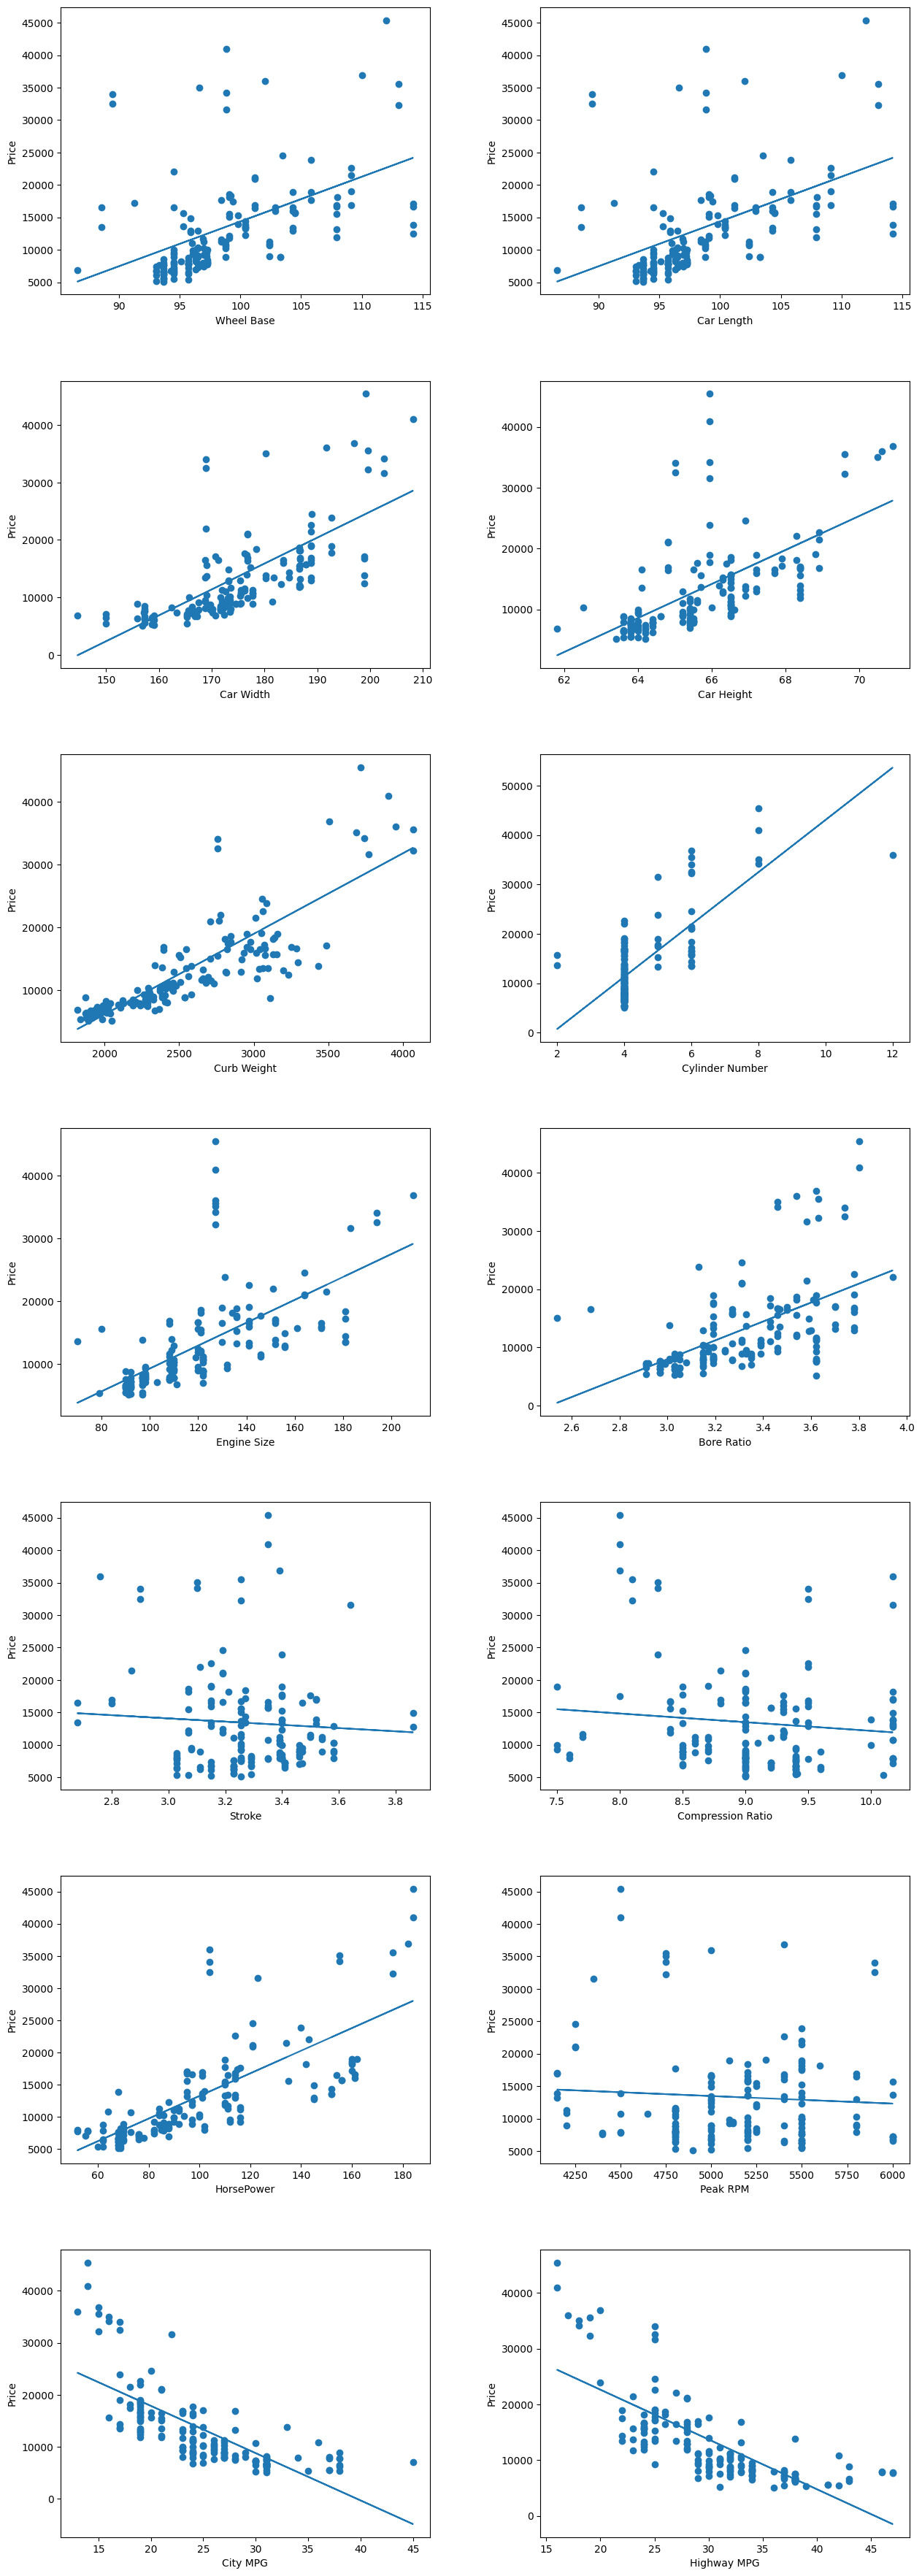


Wheelbase R2: 0.23621628988561738

Car Length R2: 0.23621628988561738

Car Width R2: 0.37811403517089914

Car Height R2: 0.42162615337177545

Curb Weight R2: 0.679374237944807

Cylinder Number R2: 0.48867579159012464

Engine Size R2: 0.7447715677234817

Bore Ratio R2: 0.3090064409010991

Stroke R2: -0.04344927463313164

Compression Ratio R2: -0.04261342461808981

Horse Power R2: 0.3929972904944449

Peak RPM R2: -0.032280657514235145

City MPG R2: 0.3626701028472411

Highway MPG R2: 0.34456119514634076



In [314]:
# IV vs DV
wbvsp = LinearRegression(x_wheelbase, y_price)
wbvsp.plot("Wheel Base", "Price")
clvsp = LinearRegression(x_wheelbase, y_price)
clvsp.plot("Car Length", "Price")
cwvsp = LinearRegression(x_carlength, y_price)
cwvsp.plot("Car Width", "Price")
chvsp = LinearRegression(x_carwidth, y_price)
chvsp.plot("Car Height", "Price")
cwevsp = LinearRegression(x_curbweight, y_price)
cwevsp.plot("Curb Weight", 'Price')
cnvsp = LinearRegression(x_cylindernumber, y_price)
cnvsp.plot("Cylinder Number", 'Price')
esvsp = LinearRegression(x_enginesize, y_price)
esvsp.plot("Engine Size", 'Price')
brvsp = LinearRegression(x_boreratio, y_price)
brvsp.plot("Bore Ratio", "Price")
svsp = LinearRegression(x_stroke, y_price)
svsp.plot("Stroke", 'Price')
crvsp = LinearRegression(x_compressionratio, y_price)
crvsp.plot("Compression Ratio", 'Price')
hpvsp = LinearRegression(x_horsepower, y_price)
hpvsp.plot("HorsePower", 'Price')
prvsp = LinearRegression(x_peakrpm, y_price)
prvsp.plot("Peak RPM", "Price")
cmvsp = LinearRegression(x_citympg, y_price)
cmvsp.plot("City MPG", 'Price')
hmvsp = LinearRegression(x_highwaympg, y_price)
hmvsp.plot("Highway MPG", 'Price')

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(15, 45))

fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(wbvsp.x_train, wbvsp.y_train)
ax1.plot(wbvsp.x_train, wbvsp.y_pred_train)
ax1.set_xlabel(wbvsp.nameX)
ax1.set_ylabel(wbvsp.nameY)

ax2.scatter(clvsp.x_train, clvsp.y_train)
ax2.plot(clvsp.x_train, clvsp.y_pred_train)
ax2.set_xlabel(clvsp.nameX)
ax2.set_ylabel(clvsp.nameY)


ax3.scatter(cwvsp.x_train, cwvsp.y_train)
ax3.plot(cwvsp.x_train, cwvsp.y_pred_train)
ax3.set_xlabel(cwvsp.nameX)
ax3.set_ylabel(cwvsp.nameY)

ax4.scatter(chvsp.x_train, chvsp.y_train)
ax4.plot(chvsp.x_train, chvsp.y_pred_train)
ax4.set_xlabel(chvsp.nameX)
ax4.set_ylabel(chvsp.nameY)

ax5.scatter(cwevsp.x_train, cwevsp.y_train)
ax5.plot(cwevsp.x_train, cwevsp.y_pred_train)
ax5.set_xlabel(cwevsp.nameX)
ax5.set_ylabel(cwevsp.nameY)

ax6.scatter(cnvsp.x_train, cnvsp.y_train)
ax6.plot(cnvsp.x_train, cnvsp.y_pred_train)
ax6.set_xlabel(cnvsp.nameX)
ax6.set_ylabel(cnvsp.nameY)

ax7.scatter(esvsp.x_train, esvsp.y_train)
ax7.plot(esvsp.x_train, esvsp.y_pred_train)
ax7.set_xlabel(esvsp.nameX)
ax7.set_ylabel(esvsp.nameY)

ax8.scatter(brvsp.x_train, brvsp.y_train)
ax8.plot(brvsp.x_train, brvsp.y_pred_train)
ax8.set_xlabel(brvsp.nameX)
ax8.set_ylabel(brvsp.nameY)

ax9.scatter(svsp.x_train, svsp.y_train)
ax9.plot(svsp.x_train, svsp.y_pred_train)
ax9.set_xlabel(svsp.nameX)
ax9.set_ylabel(svsp.nameY)

ax10.scatter(crvsp.x_train, crvsp.y_train)
ax10.plot(crvsp.x_train, crvsp.y_pred_train)
ax10.set_xlabel(crvsp.nameX)
ax10.set_ylabel(crvsp.nameY)

ax11.scatter(hpvsp.x_train, hpvsp.y_train)
ax11.plot(hpvsp.x_train, hpvsp.y_pred_train)
ax11.set_xlabel(hpvsp.nameX)
ax11.set_ylabel(hpvsp.nameY)

ax12.scatter(prvsp.x_train, prvsp.y_train)
ax12.plot(prvsp.x_train, prvsp.y_pred_train)
ax12.set_xlabel(prvsp.nameX)
ax12.set_ylabel(prvsp.nameY)

ax13.scatter(cmvsp.x_train, cmvsp.y_train)
ax13.plot(cmvsp.x_train, cmvsp.y_pred_train)
ax13.set_xlabel(cmvsp.nameX)
ax13.set_ylabel(cmvsp.nameY)

ax14.scatter(hmvsp.x_train, hmvsp.y_train)
ax14.plot(hmvsp.x_train, hmvsp.y_pred_train)
ax14.set_xlabel(hmvsp.nameX)
ax14.set_ylabel(hmvsp.nameY)

plt.show()

print(f"""
Wheelbase R2: {wbvsp.r2score}

Car Length R2: {clvsp.r2score}

Car Width R2: {cwvsp.r2score}

Car Height R2: {chvsp.r2score}

Curb Weight R2: {cwevsp.r2score}

Cylinder Number R2: {cnvsp.r2score}

Engine Size R2: {esvsp.r2score}

Bore Ratio R2: {brvsp.r2score}

Stroke R2: {svsp.r2score}

Compression Ratio R2: {crvsp.r2score}

Horse Power R2: {hpvsp.r2score}

Peak RPM R2: {prvsp.r2score}

City MPG R2: {cmvsp.r2score}

Highway MPG R2: {hmvsp.r2score}
""")

Terdapat dua Variable bebas yang memiliki relasi yang rendah yaitu

1. Wheel Base
2. Car Length
3. Car Width
4. Cylinder Number
5. Bore Ratio
6. Stroke
7. Compression Ratio
8. Peak RPM
9. City MPG
10. Highway MPG

Dan Variable bebas ini tidak akan digunakan dan terdapat 4 variable bebas yang dapat digunakan yaitu

1. Car Height
2. Curb Weight
3. Engine Size
4. Horse Power

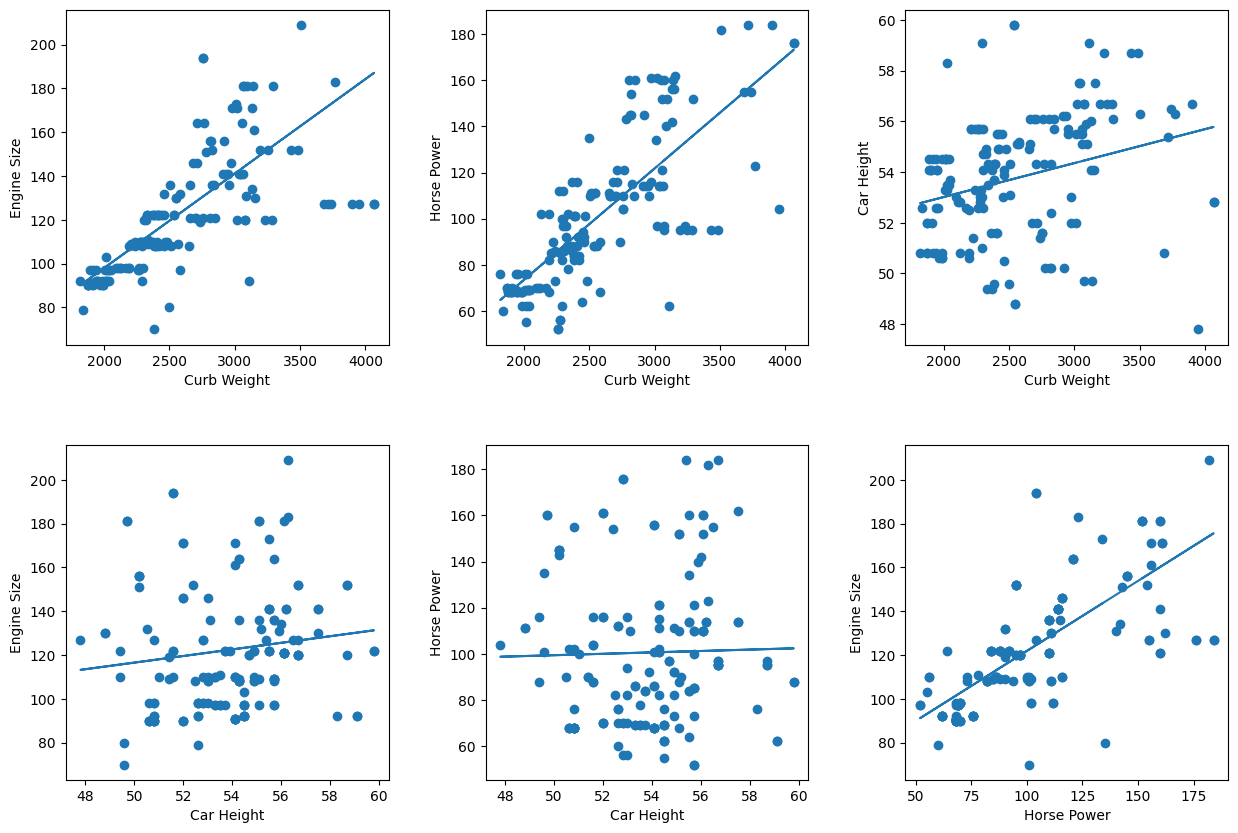


Curb Weight & Engine Size R2: 0.6555622834751889

Curb Weight & Horse Power R2: 0.5442408997716588

Curb Weight & Car Height R2: 0.05017565906305266

Car Height & Engine Size R2: -0.012019555400936799

Car Height & Horse Power R2: 1.1134294237602482e-05

Horse Power & Engine Size R2: 0.433976518058944



In [315]:
# IV vs IV
# Jika Ada yang memiliki relasi gunakan salah satu dari IV Variable
cwevses = LinearRegression(x_curbweight, x_enginesize)
cwevses.plot("Curb Weight", 'Engine Size')
cwevshp = LinearRegression(x_curbweight, x_horsepower)
cwevshp.plot("Curb Weight", 'Horse Power')
cwevsch = LinearRegression(x_curbweight, x_carheight)
cwevsch.plot("Curb Weight", 'Car Height')
chvses = LinearRegression(x_carheight, x_enginesize)
chvses.plot("Car Height", 'Engine Size')
chvshp = LinearRegression(x_carheight, x_horsepower)
chvshp.plot("Car Height", 'Horse Power')
hpvses = LinearRegression(x_horsepower, x_enginesize)
hpvses.plot("Horse Power", 'Engine Size')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(cwevses.x_train, cwevses.y_train)
ax1.plot(cwevses.x_train, cwevses.y_pred_train)
ax1.set_xlabel(cwevses.nameX)
ax1.set_ylabel(cwevses.nameY)

ax2.scatter(cwevshp.x_train, cwevshp.y_train)
ax2.plot(cwevshp.x_train, cwevshp.y_pred_train)
ax2.set_xlabel(cwevshp.nameX)
ax2.set_ylabel(cwevshp.nameY)


ax3.scatter(cwevsch.x_train, cwevsch.y_train)
ax3.plot(cwevsch.x_train, cwevsch.y_pred_train)
ax3.set_xlabel(cwevsch.nameX)
ax3.set_ylabel(cwevsch.nameY)

ax4.scatter(chvses.x_train, chvses.y_train)
ax4.plot(chvses.x_train, chvses.y_pred_train)
ax4.set_xlabel(chvses.nameX)
ax4.set_ylabel(chvses.nameY)

ax5.scatter(chvshp.x_train, chvshp.y_train)
ax5.plot(chvshp.x_train, chvshp.y_pred_train)
ax5.set_xlabel(chvshp.nameX)
ax5.set_ylabel(chvshp.nameY)

ax6.scatter(hpvses.x_train, hpvses.y_train)
ax6.plot(hpvses.x_train, hpvses.y_pred_train)
ax6.set_xlabel(hpvses.nameX)
ax6.set_ylabel(hpvses.nameY)

plt.show()

print(f"""
Curb Weight & Engine Size R2: {cwevses.r2score}

Curb Weight & Horse Power R2: {cwevshp.r2score}

Curb Weight & Car Height R2: {cwevsch.r2score}

Car Height & Engine Size R2: {chvses.r2score}

Car Height & Horse Power R2: {chvshp.r2score}

Horse Power & Engine Size R2: {hpvses.r2score}
""")

Dari Hasil R-Squared dan Adjusted R-Squared di atas dapat ditemukan bahwa
terdapat tiga variable yang dapat dipakai dalam Multi Linear Regression Yaitu

1. Curb Weight
2. Horse Power
3. Engine SIze

In [316]:
X = df.loc[:, ['curbweight', 'horsepower', 'enginesize']]
y = df.loc[:, 'price']

x_cwe  = X.loc[:, 'curbweight']
x_hp = X.loc[:, 'horsepower']
x_es = X.loc[:, 'enginesize']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
x_cwe_train = np.array(X_train.loc[:, 'curbweight'])
x_hp_train = np.array(X_train.loc[:, 'horsepower'])
x_es_train = np.array(X_train.loc[:, 'enginesize'])

x_cwe_test = np.array(X_test.loc[:, 'curbweight'])
x_hp_test = np.array(X_test.loc[:, 'horsepower'])
x_es_test = np.array(X_test.loc[:, 'enginesize'])

y_train = np.array(y_train)
y_test = np.array(y_test)

meany = np.mean(y)
meanytrain = np.mean(y_train)
meanytest = np.mean(y_test)

mean_cwe = np.mean(x_cwe)
mean_hp = np.mean(x_hp)
mean_es = np.mean(x_es)

b1_cwe = sum((y - meany) * (x_cwe - mean_cwe)) / sum((x_cwe - mean_cwe) ** 2)
b1_hp = sum((y - meany) * (x_hp - mean_hp)) / sum((x_hp - mean_hp) ** 2)
b1_es = sum((y - meany) * (x_es - mean_es)) / sum((x_es - mean_es) ** 2)

b0 = meany - (b1_cwe * mean_cwe) - (b1_hp * mean_hp) - (b1_es * mean_es)

y_pred_train = b0 + (b1_cwe * x_cwe_train) + (b1_hp * x_hp_train) + (b1_es * x_es_train)
y_pred_test = b0 + (b1_cwe * x_cwe_test) + (b1_hp * x_hp_test) + (b1_es * x_es_test)

In [319]:
from sklearn.metrics import r2_score
# R2 Score and Adjusted R2
# R2 Score is best fit to be use for Linear Regression
# Adjusted R2 is best fit for Multi Linear Regression due to many independent variable that involves in the Regression
r2score = 1 - sum((y_test - y_pred_test) ** 2) / sum((y_test - meanytest) ** 2)
adj_r2score = 1 - (((1 - r2score) * (len(y_test) - 1)) / (len(y_test) - 3 - 1))
# MSE
MSE = (sum((y_test - y_pred_test) ** 2) / len(y_test))
MAPE = (sum((y_test - y_pred_test) / y_test) / len(y_test)) * 100

print(f"""
R-squared: {r2score}
Adjusted R-Squared: {adj_r2score}
MSE: {MSE}
MAPE: {MAPE}%
""")


R-squared: -0.7049951855221901
Adjusted R-Squared: -0.8432380384023679
MSE: 142062004.91856992
MAPE: 35.997771341762444%

